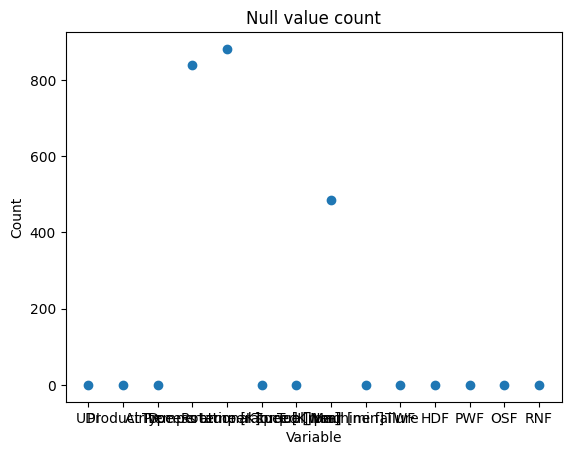


Shape of data is: (10000, 14)

Details of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      9162 non-null   float64
 4   Process temperature [K]  9119 non-null   float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          9516 non-null   float64
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      100

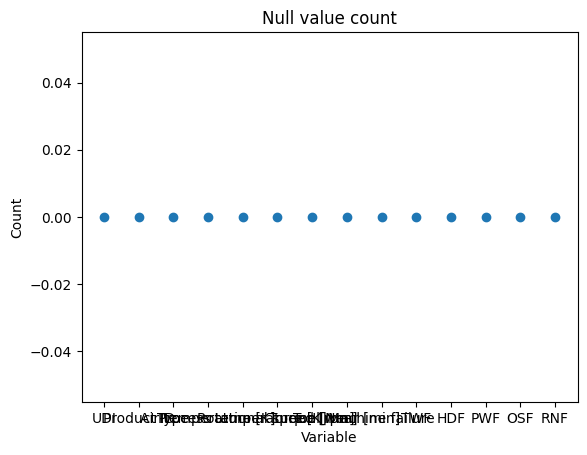

Checking skewness...
Skewness of "UDI" is 0.0.


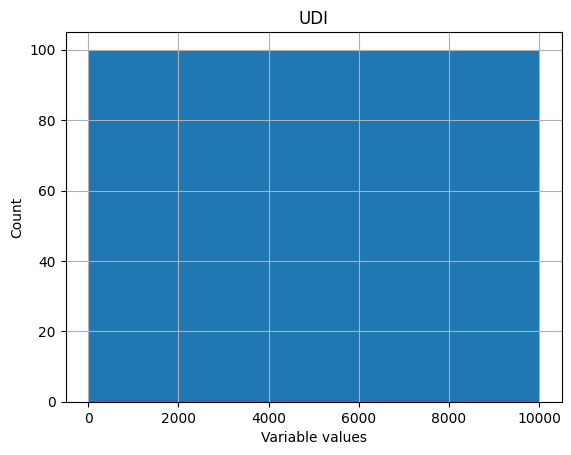

Skewness of "Air temperature [K]" is 0.1118076946528201.


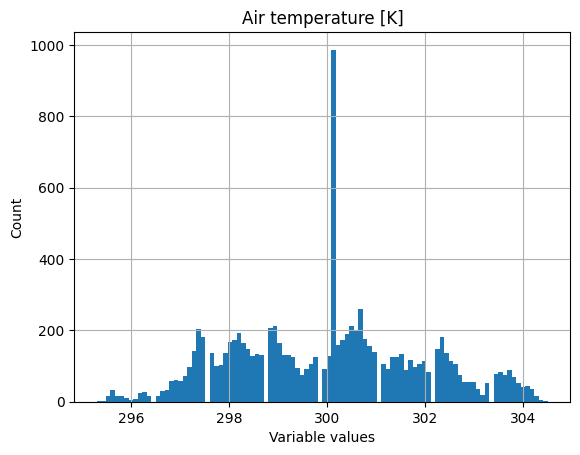

Skewness of "Process temperature [K]" is -0.009679130151231216.


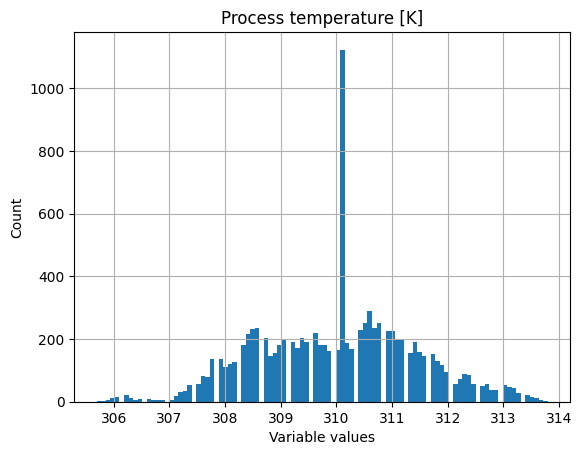

Skewness of "Rotational speed [rpm]" is 1.993171004713752.


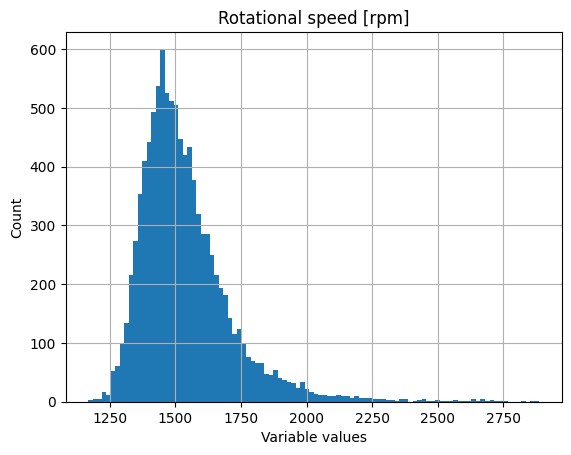

Rotational speed [rpm] heavily skewed: 1.993171004713752
Skewness of "Torque [Nm]" is -0.009516595840058564.


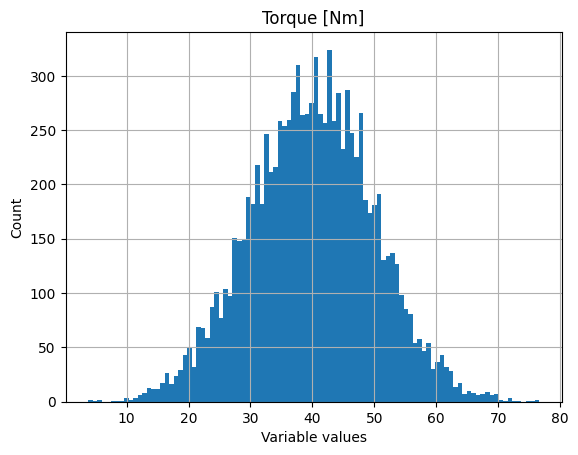

Skewness of "Tool wear [min]" is 0.022229064815386737.


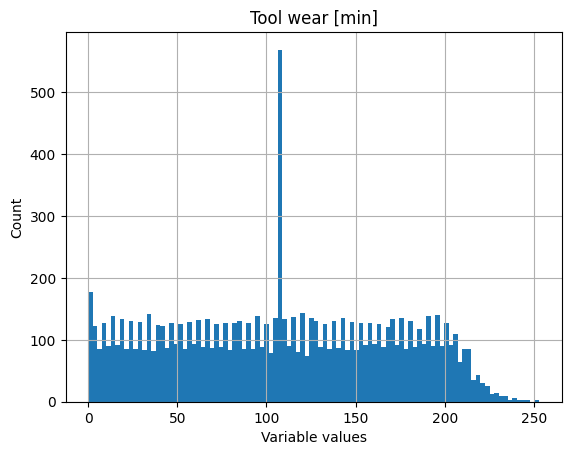


Correcting skewed data...
Skewed data corrected (log): Rotational speed [rpm]    1.30937
dtype: float64
Removing outliers...


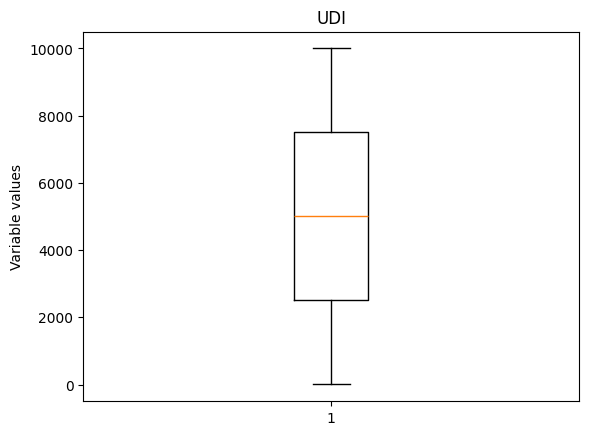

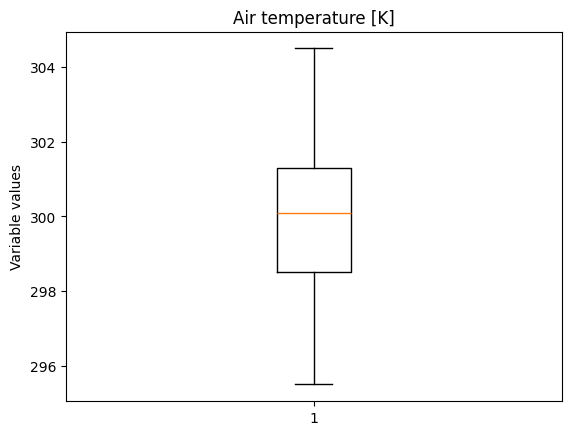

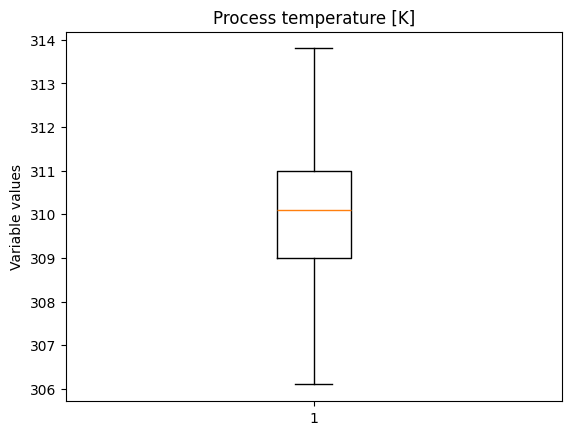

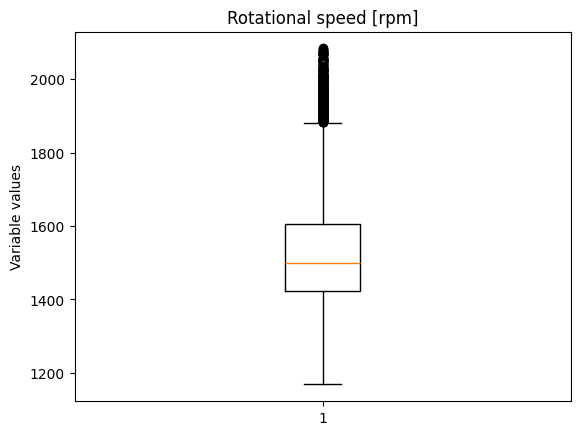

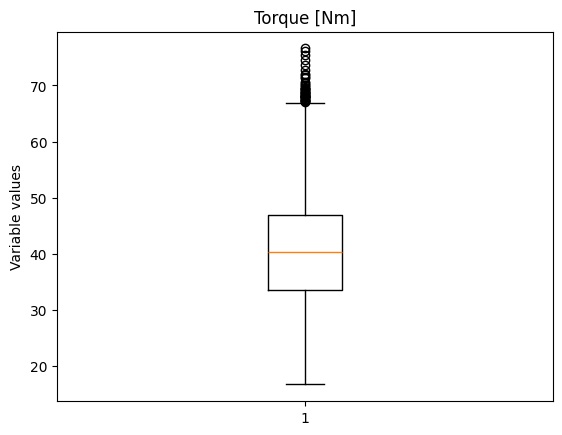

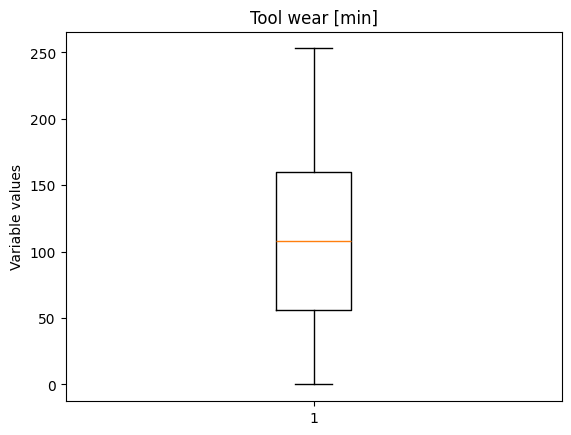

Checking correlation of columns...
                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.795503   
Process temperature [K]             0.795503                 1.000000   
Rotational speed [rpm]              0.016834                 0.011987   
Torque [Nm]                        -0.009845                -0.007451   
Tool wear [min]                     0.017860                 0.011848   
Machine failure                     0.080189                 0.037118   
TWF                                 0.009901                 0.008263   
HDF                                 0.133292                 0.055057   
PWF                                -0.001113                -0.005120   
OSF                                -0.000809                 0.004317   
RNF                                 0.021913                 0.020486   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
Air tem

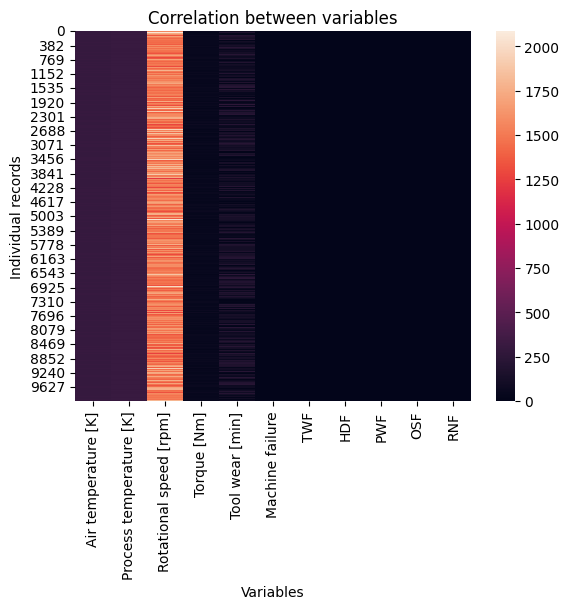

Values for all product types...
+-------------------------+---------+
| Conditon                |   Range |
+=========================+=========+
| Air temperature [K]     |     9   |
+-------------------------+---------+
| Process temperature [K] |     7.7 |
+-------------------------+---------+
| Rotational speed [rpm]  |   916   |
+-------------------------+---------+
| Torque [Nm]             |    59.9 |
+-------------------------+---------+
| Tool wear [min]         |   253   |
+-------------------------+---------+

Values for: H...
+-------------------------+---------+
| Conditon                |   Range |
+=========================+=========+
| Air temperature [K]     |     8.6 |
+-------------------------+---------+
| Process temperature [K] |     7.4 |
+-------------------------+---------+
| Rotational speed [rpm]  |   859   |
+-------------------------+---------+
| Torque [Nm]             |    54.3 |
+-------------------------+---------+
| Tool wear [min]         |   246   |


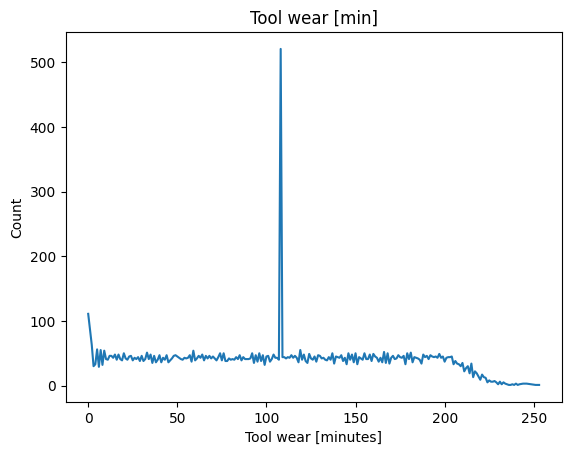

Count of failures is 306 out of 9511 machining sessions. The percentage total of failures is: 3.22

Actual count:	 Type               H     L     M
Machine failure                 
0                966  5678  2867
1                 20   214    72
                  Type                      
Type                 H      L      M     All
Machine failure                             
0                 9.84  57.84  29.20   96.88
1                 0.20   2.18   0.73    3.12
All              10.04  60.02  29.94  100.00

Percentage of results	                 Chi-square test  results
0  Pearson Chi-square ( 2.0) =   13.3770
1                    p-value =    0.0012
2                 Cramer's V =    0.0369

Failure cases method.


c:\Users\clj\miniconda3\envs\EDA_env\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 2.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


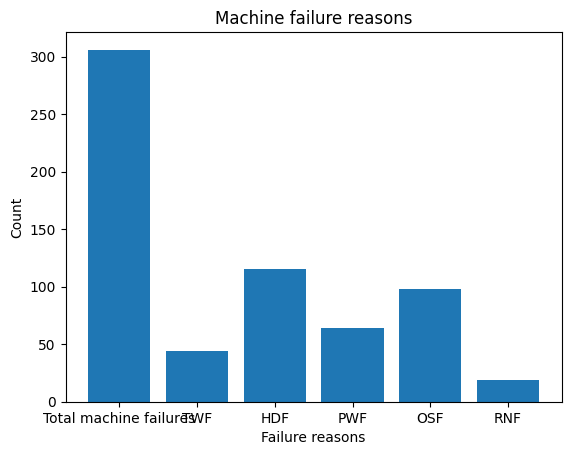

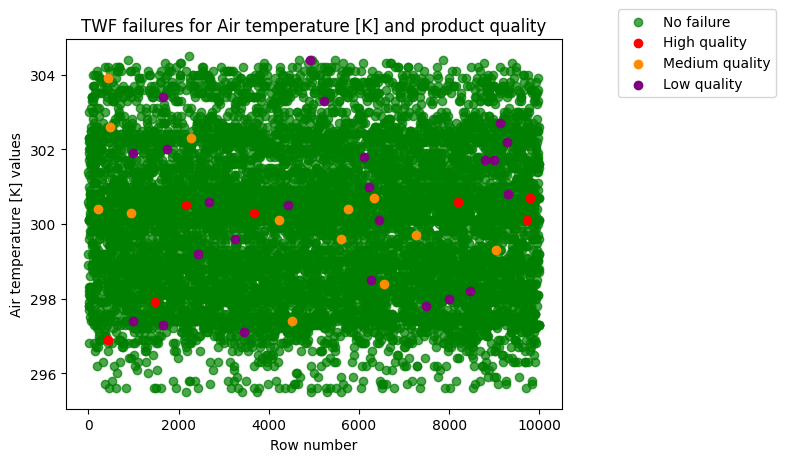

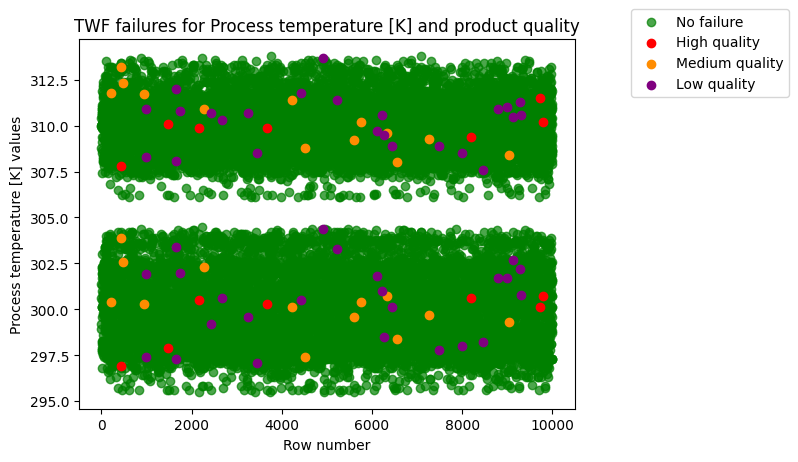

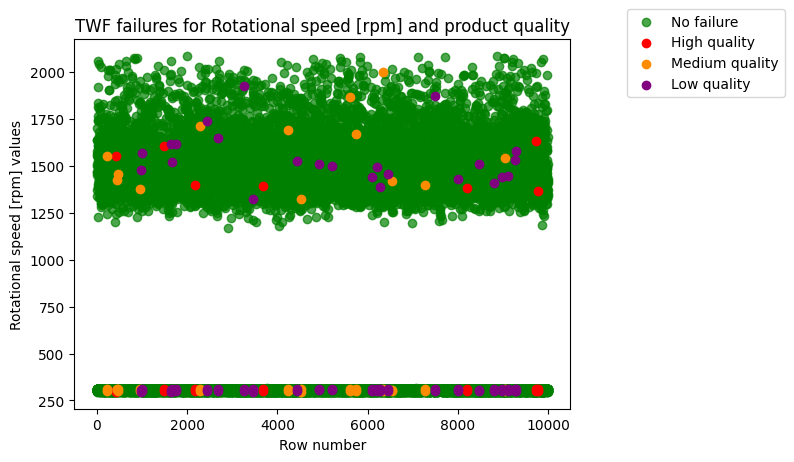

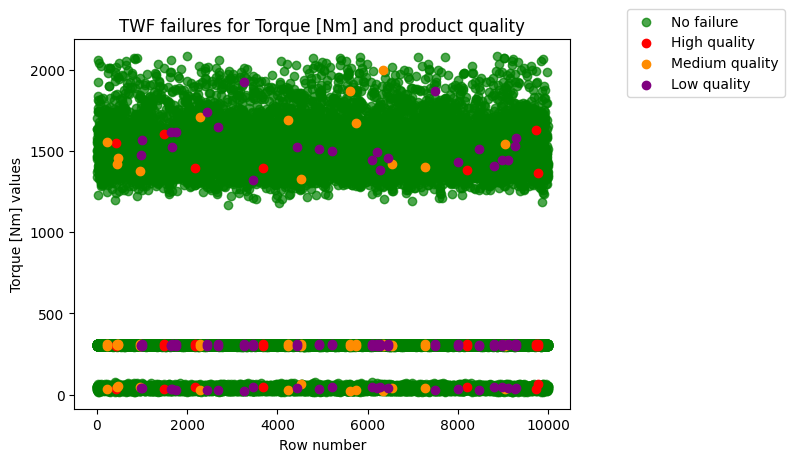

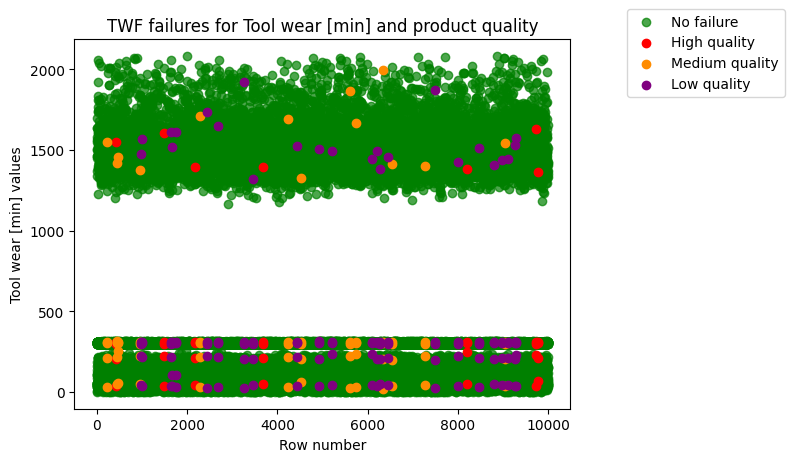

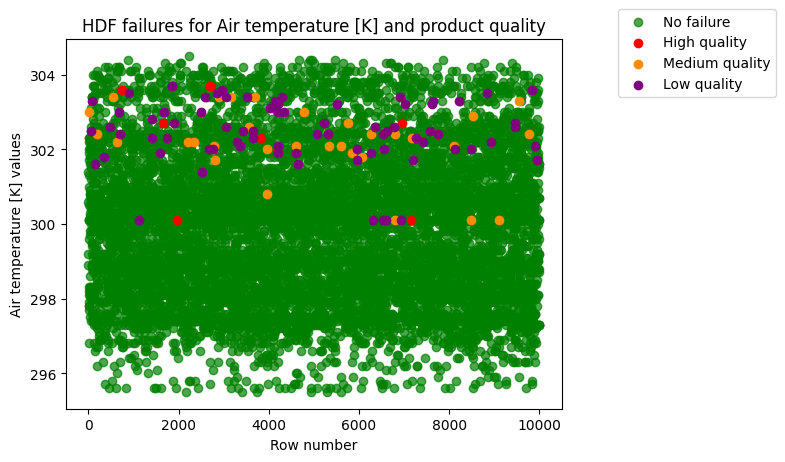

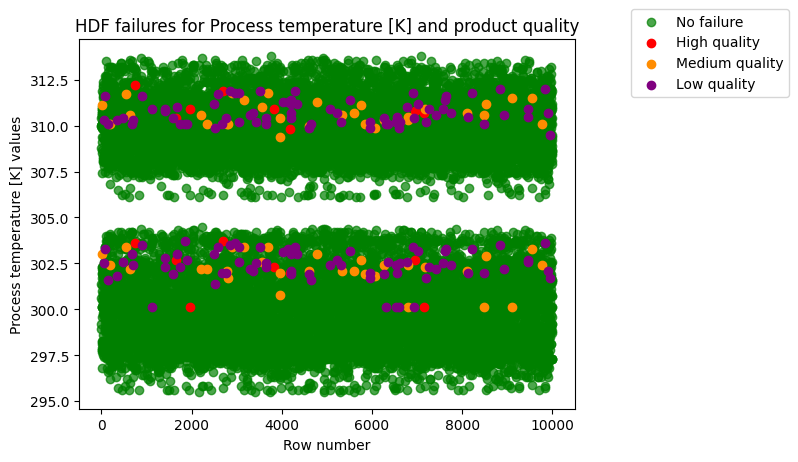

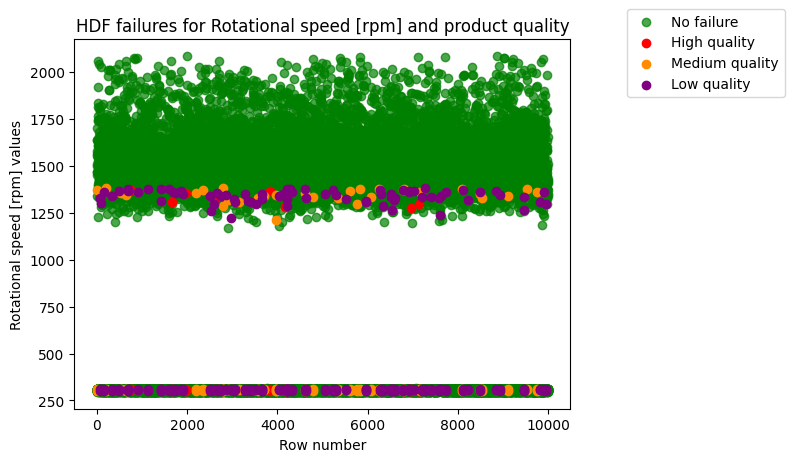

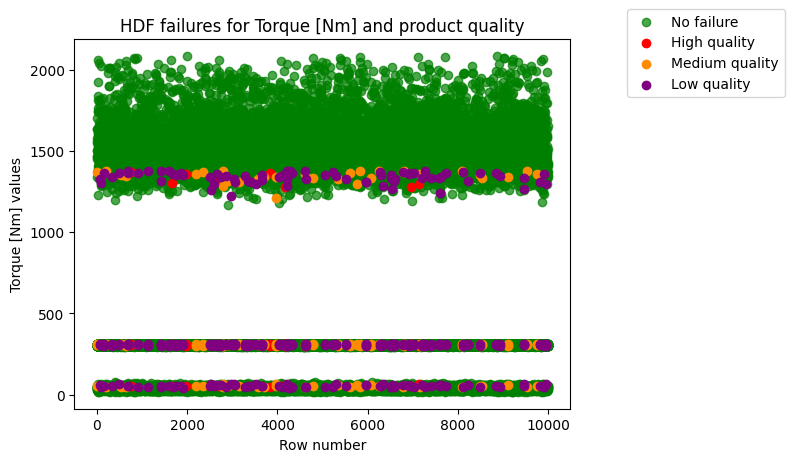

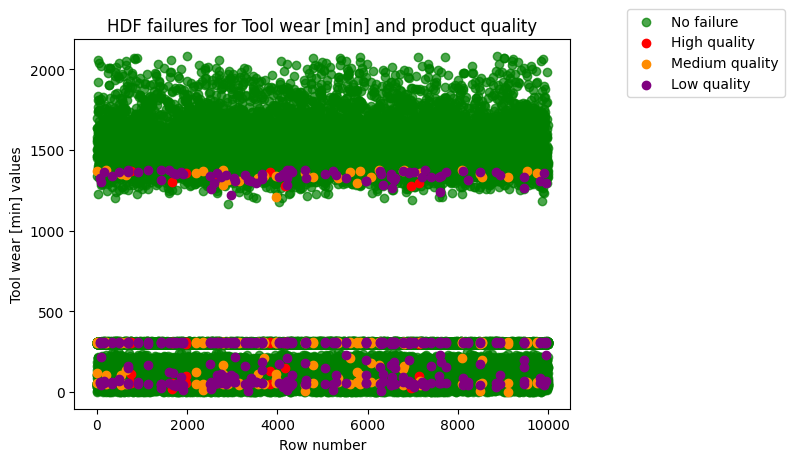

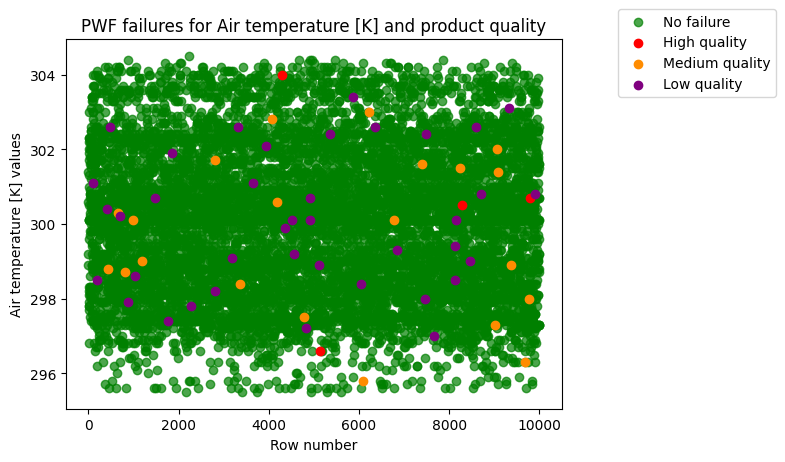

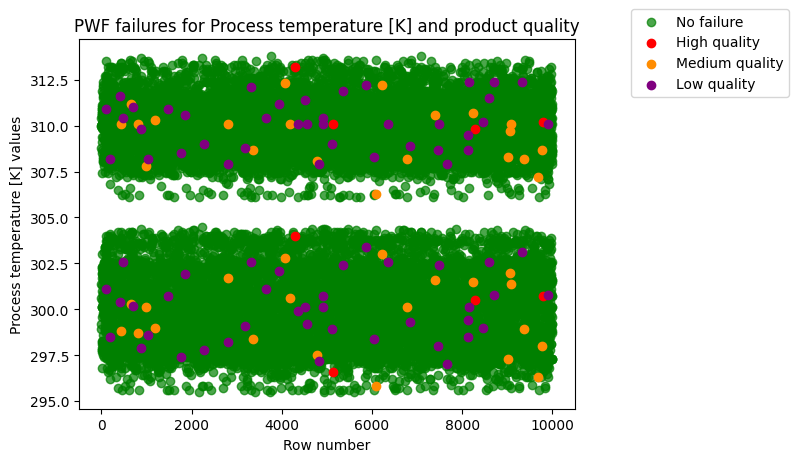

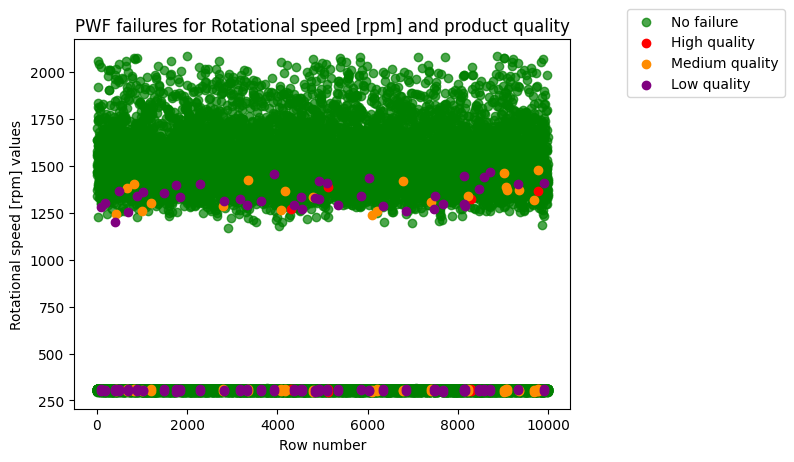

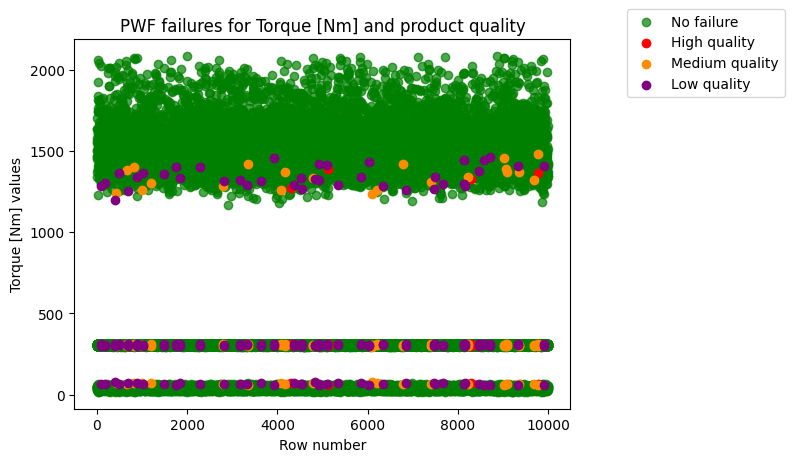

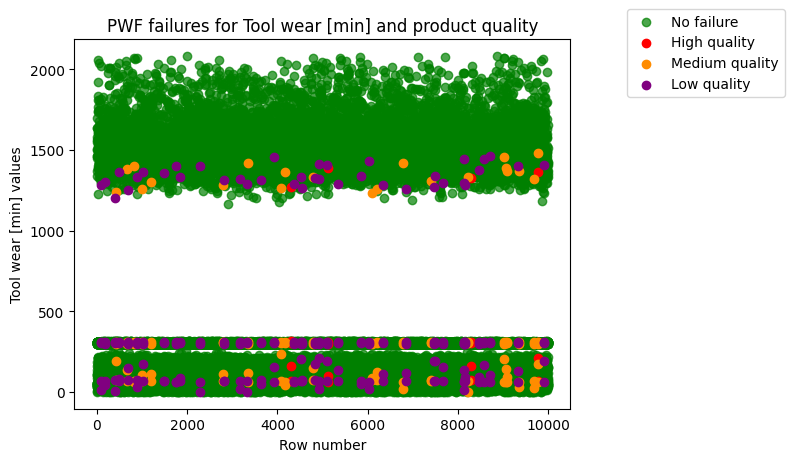

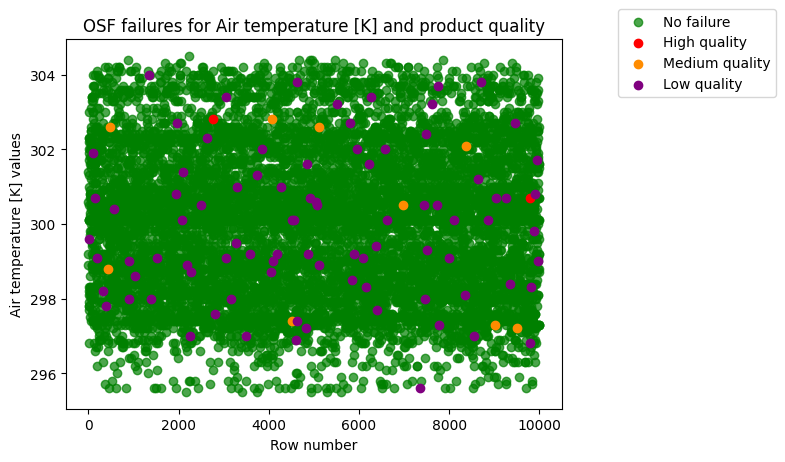

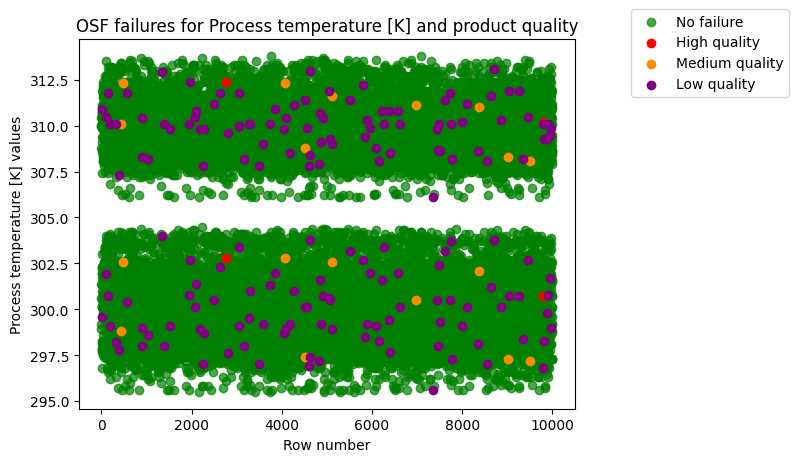

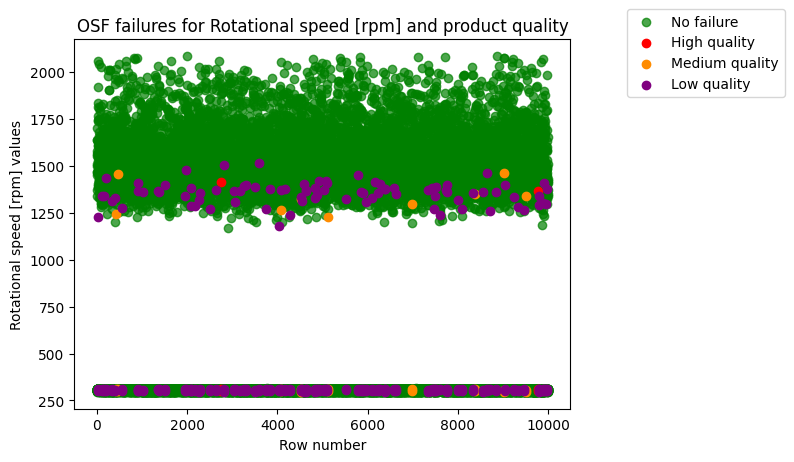

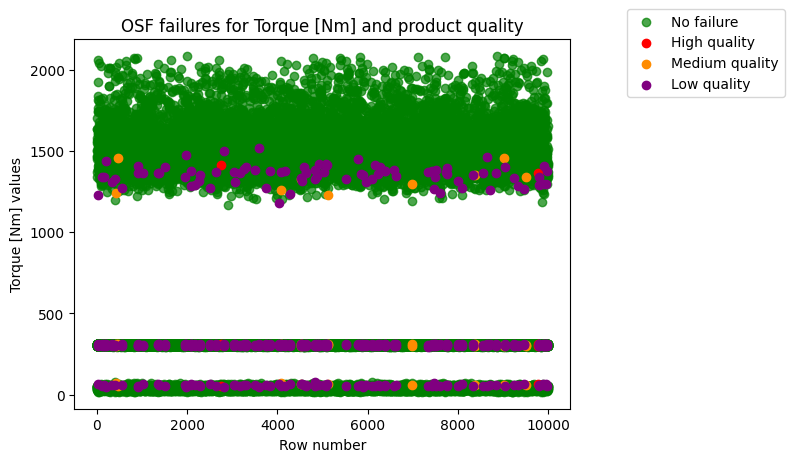

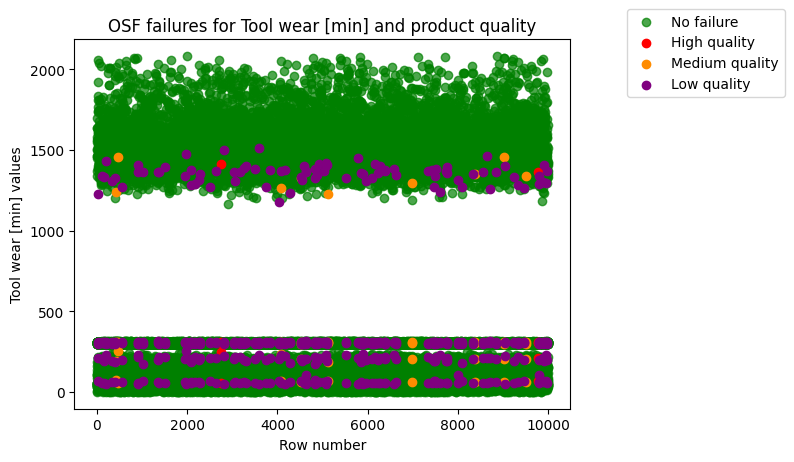

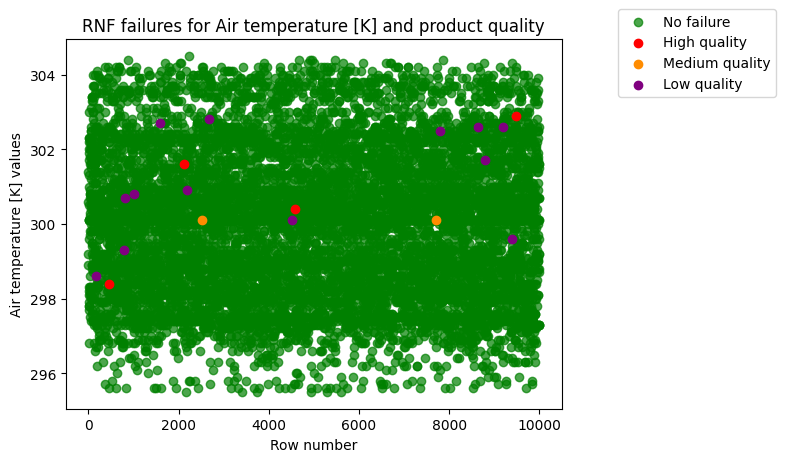

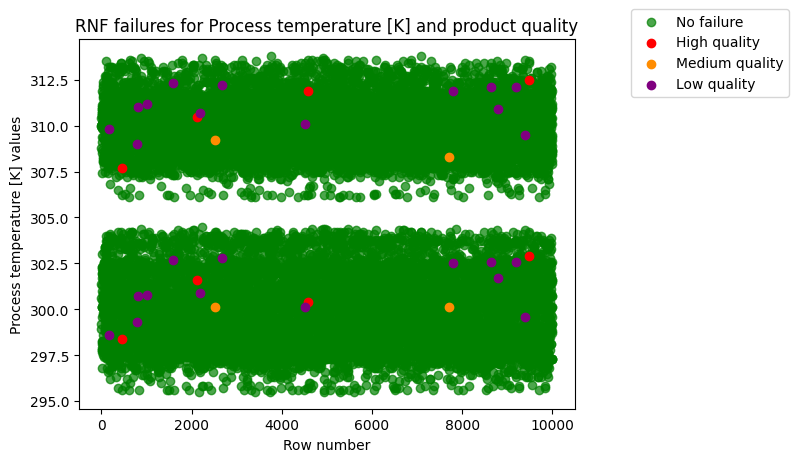

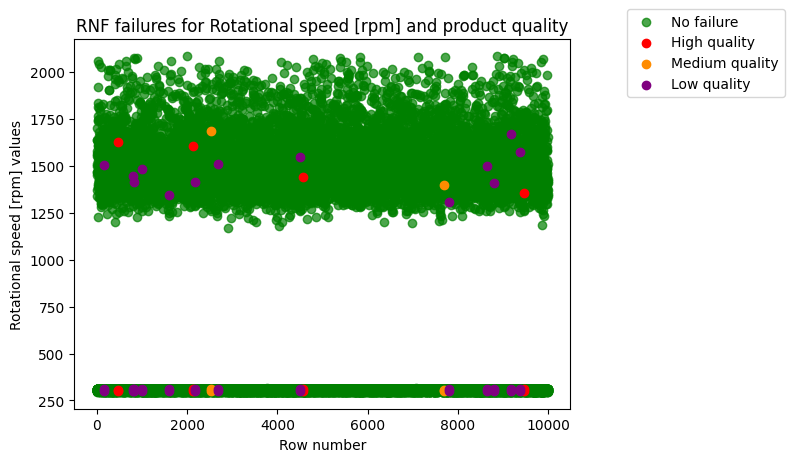

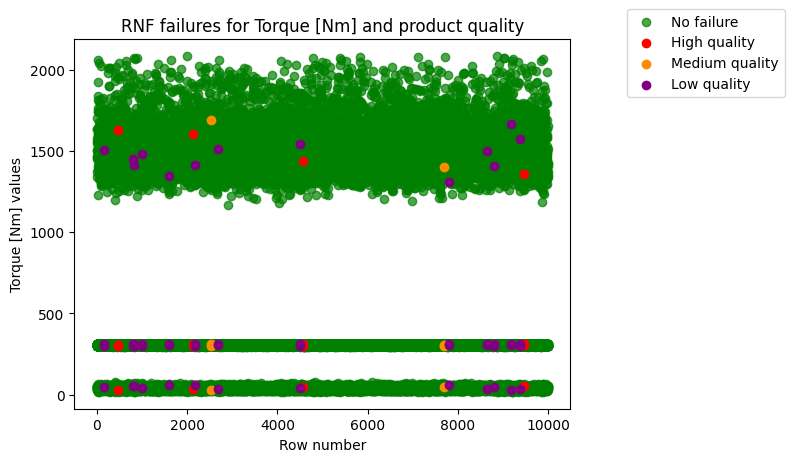

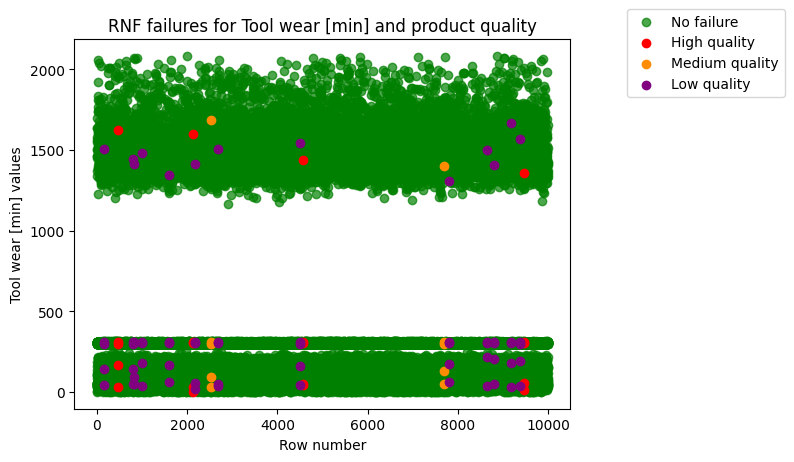

In [11]:
from db_utils import RDSDatabaseConnector
from data_extraction import DataExtractor
from data_cleaning import DataFrameInfo, Plotter, DataFrameTransformer
import pandas as pd
import numpy as np
 
if __name__ == '__main__':
    
    #  Get credentials and connect to database
     db_connector = RDSDatabaseConnector('credentials.yaml')
     db_connector.read_db_creds()
     db_connector.init_db_engine()
     db_extractor = DataExtractor()
     table_name = 'failure_data'
     df_extracted= db_extractor.read_rds_table(db_connector, table_name)
     df_plotter = Plotter(df_extracted)
     df_plotter.graph_nulls(df_extracted)
     
    #  Save data into .csv format- make sure .csv file closed
     df_extracted.to_csv('df_extracted.csv')
     
    #  Load data from local machine into pandas df. 
     local_df = pd.read_csv('df_extracted.csv')
    
    #  Get basic overview of the dataframe
     print()
     print('Shape of data is:', df_extracted.shape)
     print()
     print('Details of data:') 
     print(df_extracted.info())
     print()
     
    #  Convert columns to correct format
     #  df_cleaner = DataTransform(df_extracted)
     #  df_cleaned = df_cleaner.clean_columns() #didn't need to 
    
    #  Get info about dataframe
     df_information = DataFrameInfo(df_extracted)
     
    #  Impute missing data
     print('Checking null values...')
     nulls_columns_to_sort = df_information.nulls()
     print('Getting median values...')
     to_sort = df_information.get_median(nulls_columns_to_sort)
     df_transformed = DataFrameTransformer(df_extracted)
     non_null_df = df_transformed.update_tables(to_sort)
     
    #  Visualise missing data 
     df_plotter =  Plotter(non_null_df)
     df_plotter.graph_nulls(non_null_df)
     
    #  Find and visualise skewed data 
     ##rotational speed skewness probably right skewed because can't be less than 0 and no upper bound 
     ##  https://statisticsbyjim.com/basics/skewed-distribution/, rest of them under 0.5 skew so okay
     print('Checking skewness...')
     numeric_non_bool_columns = [x for x in non_null_df.select_dtypes(include=np.number) if x not in ['UID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
     skewed = df_plotter.skewness(non_null_df)  
     
    #  Correct skew
     print('Correcting skewed data...')
     skew_corrected = df_transformed.correct_skew(skewed)  
     
     
    #  Visualise and remove outliers 
     print('Removing outliers...')
     outliers_removed = df_transformed.find_outliers(table=non_null_df, column='Rotational speed [rpm]')
     outliers_removed = df_transformed.find_outliers(table=non_null_df, column='Process temperature [K]')
     outliers_removed = df_transformed.find_outliers(table=non_null_df, column='Torque [Nm]')
     df_plotter.box_plots(table=outliers_removed)
     
    #  Find collinearity between columns 
     print('Checking correlation of columns...')
     numeric_columns = non_null_df.loc[:, ~non_null_df.columns.isin(['UDI', 'Product ID', 'Type'])] 
     df_plotter.matrix(numeric_columns)
     #If want to drop rotational speed to help with collinearity- can use below and refer to it in future calls
    #  outliers_removed = outliers_removed.drop('Rotational speed [rpm]', axis=1)
    #  print()
    #  print('Showing new dataframe...')
    #  print(outliers_removed)
     
    #  Find operating ranges of machines
     df_plotter.check_ranges(None)
     df_plotter.check_ranges('H')
     df_plotter.check_ranges('M')
     df_plotter.check_ranges('L')
    #  Find upper limit of tool wear and number of tools operating at it so know which machines may need replacing soon
     df_plotter.upper_tool_wear_limit('Tool wear [min]')
    
    #  Visualise and quantify failure rate of machines 
     df_plotter.failure_rate('Machine failure')
     df_plotter.failure_by_product_quality('Machine failure', 'Type')
     df_plotter.failure_cases()
     
    # Find out what is causing failures 
     df_plotter.failure_corr('TWF')
     df_plotter.failure_corr('HDF')
     df_plotter.failure_corr('PWF')
     df_plotter.failure_corr('OSF') 
     df_plotter.failure_corr('RNF')
    

# Failure report

## Recommendations: 
- Operate machines at torque and rotational speed of over 1500. 
- Operate at air and process temperatures of less than 300. 
- Reconsider process for manufacture of low quality products. 

## Product type considerations:
- Only 3% of machining sessions ended in failure and these were mainly associated with low quality products. 
- More low quality products are produced than high and medium quality but the results suggest that the pattern of failures is not likely to be due to chance. 

## Breakdown of results:
Count of failures is 306 out of 9511 machining sessions. 214 of these 306 failures are from low quality products. 5892 out of 9511 machine sessions were for low quality products. 
### TWF (tool wear failure)
- rotational speed: most errors around 260-- operate at higher speeds
- torque: most errors below 400-- operate at higher torque
- tool wear: most errors below 500-- less failures at higher tool wear 
### HDF (heat dissipation failure)
- air temperature: most errors above 302-- operate at lower air temperature
- process temperature: most errors above 300-- operate at lower process temperature
- rotational speed: most errors below 1400-- operate at over 1500
- torque: most errors below 1400-- operate at over 1500
- tool wear: most errors below 1400-- less failures at over 1500
### PWF (power failure)
- rotational speed: most errors below 1500-- operate at higher speed
- torque: most errors below 1500-- operate at over 1500
- tool wear: most errors below 1500-- less failures at over 1500
### OSF (overstrain failure)
- rotational speed: most errors below 1500-- operate at higher speed
- torque: most errors below 1500-- operate at over 1500
- tool wear: most errors below 1500-- less failures at over 1500
### RNF (random failures)
- no pattern in failures

